<a href="https://colab.research.google.com/github/jcallaghan2020/Human-Genome-Analysis/blob/main/2nd_file2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statistics as stat
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
from __future__ import division
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline


# import scikit-allel
!pip install scikit-allel
import allel
# check which version is installed
print(allel.__version__)


import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#this is the 2nd file, to run this code you need to upload the file to your drive and change the name to match ( CEU22.gt.snps.poly.nomissing (1) ),
#or change the code to what yours is named
test_sample = allel.read_vcf('/content/drive/MyDrive/CEU22.gt.snps.poly.nomissing (1).vcf.gz')
gt_test = allel.GenotypeArray(test_sample['calldata/GT'])
het_count = gt_test.count_het()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 6.0 MB/s 
1.3.5
Mounted at /content/drive


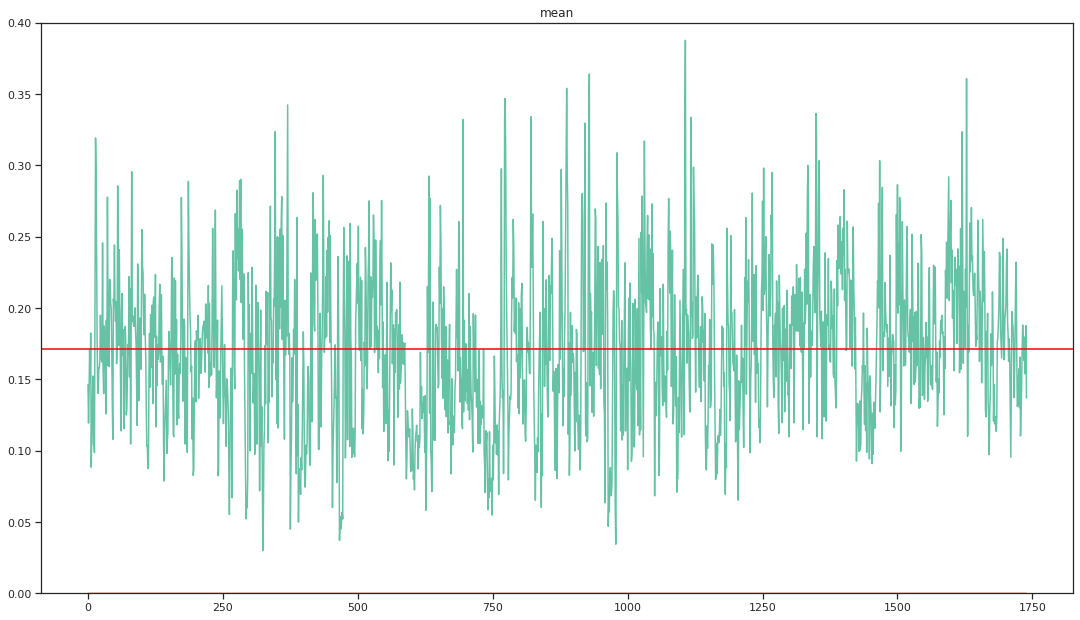

In [ ]:
#trying to do mean
mean_lst = []
f_het_rate_lst = []
count = 0
hom_rate = 0
het_rate = 0
hom_rate2 = 0
het_rate2 = 0

#calc mean rate for individual sections
#het = different allele values (1/0 or 0/1), hom = same allele values (0/0 or 1/1)
for i in gt_test[0:]:
  i_lst = i.tolist()
  for n in i_lst:
    if n == [0, 0] or n == [1, 1]:
      count = count + 1
      hom_rate = hom_rate + 1
    if n == [1, 0] or n == [0, 1]:
      count = count + 1
      het_rate = het_rate + 1
    if count == 10000:    #divide into sections of 100 samples (size might need to change)
      f_het_rate = het_rate / (het_rate + hom_rate) #calculate ratio of heterozygous alleles
      f_het_rate_lst.append(f_het_rate) #add ratio to list
      hom_rate = 0
      het_rate = 0
      f_het_rate = 0
      count = 0
      mean = stat.mean(f_het_rate_lst)
      mean_lst.append(mean)
      f_het_rate_lst = []
      mean = 0

#calc mean rate for all data
n_het_rate = stat.mean(mean_lst)
#print(n_het_rate)
#print(f_het_rate_lst)

x = range(1740)
line = 0
line = [line for i in x]
plt.plot(x, mean_lst)
plt.plot(x, line)
plt.axhline(y=n_het_rate, color='r', linestyle='-')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title('mean')
plt.ylim(0, 0.4)
plt.show()

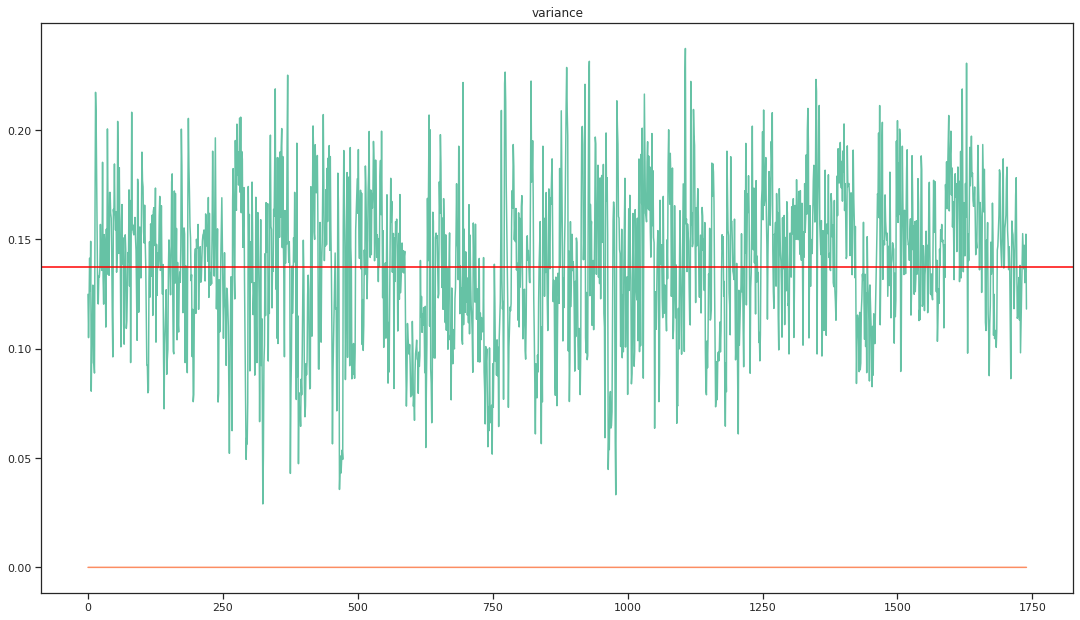

In [ ]:
#trying to do variance
f_het_rate_lst = []
het_rate = 0
hom_rate = 0
count = 0
var_lst = []
d_lst = []
n_het_rate = 0
het_rate2 = 0
hom_rate2 = 0
n = 0
i = 0
i_lst = []
h_r_lst = []
f_h_r_lst = []
is_hom1 = np.array([1, 1])
is_hom2 = np.array([0, 0])
is_het1 = np.array([0, 1])
is_het2 = np.array([1, 0])


#calc var rate for individual sections
for i in gt_test[0:]:
  i_lst = i.tolist()
  for n in i_lst:
    if n == [0, 0] or n == [1, 1]:
      h_r_lst.append(0)
      count = count + 1
    if n == [1, 0] or n == [0, 1]:
      h_r_lst.append(1)
      count = count + 1
    if count == 10000:    #divide into sections of 1000 samples (size might need to change)
      hom_rate = 0
      het_rate = 0
      f_het_rate = 0
      count = 0
      s_var = stat.variance(h_r_lst)
      var_lst.append(s_var)
      h_r_lst = []



#calc var rate for all data
f_h_r_lst = []

for n in gt_test[0:]:
  if (n[:1,] == is_hom1).all() or (n[:1,]  == is_hom2).all():
    f_h_r_lst.append(0)
  if (n[:1,] == is_het1).all() or (n[:1,] == is_het2).all():
    f_h_r_lst.append(1)
f_var = np.var(f_h_r_lst)

x2 = range(1740) #this value needs to be changed based on the size of the file/size of the sections (may be an easier way to calculate it)
line = 0
line = [line for i in x2]
plt.plot(x2, var_lst)
plt.plot(x2, line)
plt.axhline(y=f_var, color='r', linestyle='-')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title('variance')
plt.show()

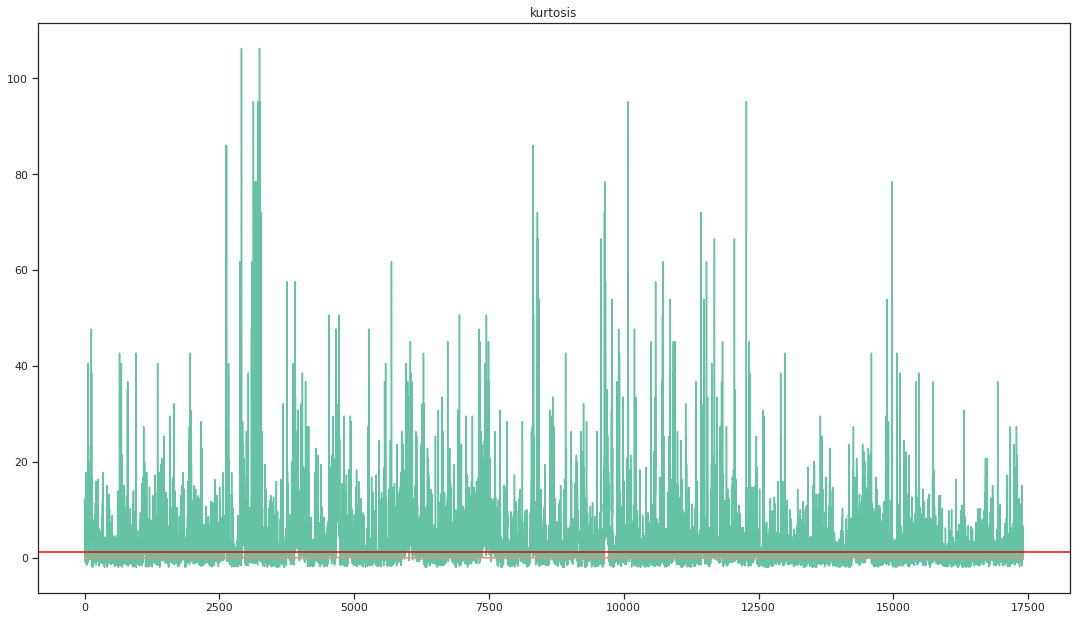

In [ ]:
#trying to do kurtosis
f_het_rate_lst = []
het_rate = 0
hom_rate = 0
count = 0
i_lst = []
kurt_lst = []
d_lst = []
n_het_rate = 0
het_rate2 = 0
hom_rate2 = 0
h_r_lst = []
n = 0
i = 0
j = 0
f_h_r_lst = []
is_hom1 = np.array([1, 1])
is_hom2 = np.array([0,0])
is_het1 = np.array([0, 1])
is_het2 = np.array([1,0])


#calc kurt rate for individual sections
for i in gt_test[0:]:
  i_lst = i.tolist()
  for n in i_lst:
    if n == [0, 0] or n == [1, 1]:
      h_r_lst.append(0)
      count = count + 1
    if n == [1, 0] or n == [0, 1]:
      h_r_lst.append(1)
      count = count + 1
    if count == 1000:    #divide into sections of 1000 samples (size might need to change)
      s_kurt = kurtosis(h_r_lst)
      kurt_lst.append(s_kurt)
      count = 0
      s_kurt = 0
      h_r_lst = []


#calc kurt rate for all data
f_h_r_lst = []

for n in gt_test[0:]:
  if (n[:1,] == is_hom1).all() or (n[:1,]  == is_hom2).all():
    f_h_r_lst.append(0)
  if (n[:1,] == is_het1).all() or (n[:1,] == is_het2).all():
    f_h_r_lst.append(1)
f_kurt = kurtosis(f_h_r_lst)


x2 = range(17407)
line = 0
line = [line for i in x2]
plt.plot(x2, kurt_lst)
plt.plot(x2, line)
plt.axhline(y=f_kurt, color='r', linestyle='-')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title('kurtosis')
plt.show()

In [ ]:
#trying to do skewness
f_het_rate_lst = []
het_rate = 0
hom_rate = 0
count = 0
d_lst = []
skew_lst = []
sample_lst = []
h_r_lst = []
n_het_rate = 0
het_rate2 = 0
hom_rate2 = 0
n = 0
i_lst = []
i = 0



#calc skew rate for individual sections
for i in gt_test[0:]:
  i_lst = i.tolist()
  for n in i_lst:
    if n == [0, 0] or n == [1, 1]:
      h_r_lst.append(0)
      count = count + 1
    if n == [1, 0] or n == [0, 1]:
      h_r_lst.append(1)
      count = count + 1
    if count == 10000:    #divide into sections of 1000 samples (size might need to change)
      s_skew = skew(h_r_lst)
      skew_lst.append(s_skew)
      count = 0
      s_skew = 0
      h_r_lst = []

#calc skew for all data
f_h_r_lst = []

for n in gt_test[0:]:
  if (n[:1,] == is_hom1).all() or (n[:1,]  == is_hom2).all():
    f_h_r_lst.append(0)
  if (n[:1,] == is_het1).all() or (n[:1,] == is_het2).all():
    f_h_r_lst.append(1)
f_skew = skew(f_h_r_lst)

x2 = range(1740)
line = 0 
line = [line for i in x2]
plt.plot(x2, skew_lst)
plt.plot(x2, line)
plt.axhline(y=f_skew, color='r', linestyle='-')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title('skewness')
plt.show()

In [ ]:
from sklearn.svm import OneClassSVM
#trying to do mean
mean_lst = []
f_het_rate_lst = []
count = 0
hom_rate = 0
het_rate = 0
hom_rate2 = 0
het_rate2 = 0

#calc mean rate for individual sections
#het = different allele values (1/0 or 0/1), hom = same allele values (0/0 or 1/1)
for i in gt_test[0:]:
  i_lst = i.tolist()
  for n in i_lst:
    if n == [0, 0] or n == [1, 1]:
      count = count + 1
      hom_rate = hom_rate + 1
    if n == [1, 0] or n == [0, 1]:
      count = count + 1
      het_rate = het_rate + 1
    if count == 10000:    #divide into sections of 100 samples (size might need to change)
      f_het_rate = het_rate / (het_rate + hom_rate) #calculate ratio of heterozygous alleles
      f_het_rate_lst.append(f_het_rate) #add ratio to list
      hom_rate = 0
      het_rate = 0
      f_het_rate = 0
      count = 0
      mean = stat.mean(f_het_rate_lst)
      mean_lst.append(mean)
      f_het_rate_lst = []
      mean = 0

print(mean_lst)

In [ ]:
mean_arr = np.array(mean_lst)
mean_arr = mean_arr.reshape(-1, 1)
clf = OneClassSVM(gamma='auto').fit(mean_arr)
pred = clf.predict(mean_arr) 
